### Numpy часть

- Выполняется с помощью numpy и базовой функциональности python.
  - [+] Получить датасет [**Ирис**](https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data)
  - [+] Представить датасет одномерный/двумерный массивы (признаки поместить в матрицу `(n, 4)`, названия самого ириса --- вектор размера n). Отобразите сколько места он занимает.
  - [+] Нормализуйте данные на промежуток от 0 до 1 для каждой колонки
  - [+] Представьте один из признаков в виде категориальной переменной и её на три типа используя квантили:
    - < 0.25 --- small
    - 0.25-0.75 --- medium
    - \> 0.75 --- big
  - [+] Разделите датасет на две случайные выборки (0.8 / 0.2)
- Выполняется с помощью пакетов sklearn и numpy
  - [+] Выберите один из [методов классификации](https://scikit-learn.org/stable/supervised_learning.html) (к примеру, [SVC](https://scikit-learn.org/stable/modules/svm.html)), обучите на тренировочном датасете, оцените результат на тестовом и сделайте выводы
  - [+] Проведите три эксперимента изменяя гиперпараметры модели или условия препроцессинга данных (например, нормализованные или нет данные), **сделайте выводы**
  - [+] Пользуясь методами [уменьшения размерности](https://ru.wikipedia.org/wiki/%D0%A1%D0%BD%D0%B8%D0%B6%D0%B5%D0%BD%D0%B8%D0%B5_%D1%80%D0%B0%D0%B7%D0%BC%D0%B5%D1%80%D0%BD%D0%BE%D1%81%D1%82%D0%B8) ([PCA](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html), [t-sne](https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html)) визуализируйте датасет.
  Это должен быть scatter plot, где точка это отдельный ирис, ее координаты -- признаки со сжатой выбранной вам размерностью, а цвет -- тип ириса. Нарисуйте этот график дважды, где
    - Тип ириса выбирается из оригинальных данных
    - Тип ириса выбирается из предсказанных данных

## Первая часть

In [ ]:
import numpy as np

##### Получаем датасет

In [ ]:
with open('iris_data.csv', 'r') as file:
    data_list = [line.strip().split(',') for line in file]


##### Представляем датасет в одномерный/двумерный массивы

In [ ]:
X = [line[:4] for line in data_list]
Y = [line[4:] for line in data_list]
X = np.array(X, dtype=float)
Y = np.array(Y)
unique_classes, Y = np.unique(Y, return_inverse=True) # 0, 1, 2
Y = Y.reshape(-1) # (150,)
print(X.shape)
print(Y.shape)
print(X.nbytes + Y.nbytes)

(150, 4)
(150,)
6000


##### Нормализуем данные для каждого столбца

In [ ]:
def normalize_data(data):
    min_vals = np.min(data, axis=0)
    max_vals = np.max(data, axis=0)
    normalized = (data - min_vals) / (max_vals - min_vals)
    return normalized

X_normalized = normalize_data(X)
print(X_normalized[:5])

[[0.22222222 0.625      0.06779661 0.04166667]
 [0.16666667 0.41666667 0.06779661 0.04166667]
 [0.11111111 0.5        0.05084746 0.04166667]
 [0.08333333 0.45833333 0.08474576 0.04166667]
 [0.19444444 0.66666667 0.06779661 0.04166667]]


##### Представление одного признака в виде категориальной переменной

In [ ]:
sepal_length_norm = X_normalized[:, 0]
q25 = np.quantile(sepal_length_norm, 0.25)
q75 = np.quantile(sepal_length_norm, 0.75)

for i in range(len(sepal_length_norm)):
    if sepal_length_norm[i] <= q25:
        sepal_length_norm[i] = 0
    elif sepal_length_norm[i] <= q75:
        sepal_length_norm[i] = 1
    else:
        sepal_length_norm[i] = 2

print(X_normalized[::5])

[[0.         0.625      0.06779661 0.04166667]
 [1.         0.79166667 0.11864407 0.125     ]
 [1.         0.70833333 0.08474576 0.04166667]
 [1.         1.         0.08474576 0.125     ]
 [1.         0.58333333 0.11864407 0.04166667]
 [0.         0.41666667 0.10169492 0.04166667]
 [0.         0.45833333 0.10169492 0.04166667]
 [0.         0.5        0.03389831 0.04166667]
 [0.         0.625      0.05084746 0.08333333]
 [0.         0.41666667 0.06779661 0.08333333]
 [2.         0.5        0.62711864 0.54166667]
 [1.         0.33333333 0.59322034 0.5       ]
 [0.         0.         0.42372881 0.375     ]
 [2.         0.45833333 0.57627119 0.54166667]
 [1.         0.5        0.6440678  0.70833333]
 [2.         0.41666667 0.57627119 0.54166667]
 [1.         0.16666667 0.47457627 0.41666667]
 [1.         0.58333333 0.59322034 0.625     ]
 [1.         0.25       0.57627119 0.45833333]
 [1.         0.41666667 0.54237288 0.45833333]
 [1.         0.54166667 0.84745763 1.        ]
 [2.         

##### разделим на тестовую выборку и тренировочную

In [ ]:
np.random.seed(42)
indices = np.random.permutation(len(X))

split_index = int(0.8 * len(X))

X_train, X_test = X[indices[:split_index]], X[indices[split_index:]]
y_train, y_test = Y[indices[:split_index]], Y[indices[split_index:]]

## Вторая часть


In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score

svc_basic = SVC(kernel = 'linear', random_state=42)
svc_basic.fit(X_train, y_train)

y_pred_basic = svc_basic.predict(X_test)

F1_basic = f1_score(y_test, y_pred_basic, average='macro')
accuracy_basic = accuracy_score(y_test, y_pred_basic)

print(accuracy_basic, F1_basic)

0.9666666666666667 0.9710144927536232


### Вывод
- Модель очень хорошо показывает себя на тестовых данных accuracy получился близким к 1, а это очень хорошо.
- Macro F1 тоже близок к 1, что значит, что модель работает очень хорошо.

### Теперь давайте проведем три эксперимента, меняя гиперпараметры и нормальзованность данных

#### Эксперимент 1: Нормализованные данные

In [ ]:
from sklearn.model_selection import train_test_split

X_normalised_train, X_normalised_test, y_normalised_train, y_normalised_test = train_test_split(X_normalized, Y,
    test_size=0.2,
    random_state=42,
    stratify=Y
)

In [ ]:
svc_normalised = SVC(kernel = 'linear', random_state=42)
svc_normalised.fit(X_normalised_train, y_normalised_train)

y_pred_normalised = svc_normalised.predict(X_normalised_test)

F1_normalised = f1_score(y_normalised_test, y_pred_normalised, average='macro')
accuracy_normalised = accuracy_score(y_normalised_test, y_pred_normalised)

print(accuracy_normalised, F1_normalised)

0.9333333333333333 0.9333333333333332


### Вывод
- Видим, что от нормализации данных качество уменьшилось.

#### Эксперимент 2: Меняем ядро модели на poly

In [ ]:
svc_poly = SVC(kernel='poly', degree=3, random_state=42)
svc_poly.fit(X_train, y_train)

y_pred_poly = svc_poly.predict(X_test)

accuracy_poly = accuracy_score(y_test, y_pred_poly)
F1_poly = f1_score(y_test, y_pred_poly, average='macro')
print(accuracy_poly, F1_poly)

0.9666666666666667 0.9710144927536232


### Вывод
- выбор ядра poly почти не влияет на качество модели

### 3 эксперимент: Выбор другого ядра sigmoid

In [ ]:
svc_sigmoid = SVC(kernel='sigmoid', random_state=42)
svc_sigmoid.fit(X_train, y_train)

y_pred_sigmoid = svc_sigmoid.predict(X_test)

accuracy_sigmoid = accuracy_score(y_test, y_pred_sigmoid)
F1_sigmoid = f1_score(y_test, y_pred_sigmoid, average='macro')

print(accuracy_sigmoid, F1_sigmoid)


0.23333333333333334 0.12612612612612614


### Вывод
- мы поменяли ядро на sigmoid и наше качество уменьшилось почти до 0.
## Главный вывод
- выбор метрики существенно влияет на качество модели

# часть 3

### мы будем уменьшать размерность и рисовать графики которые получились

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)



### Рисуем графики

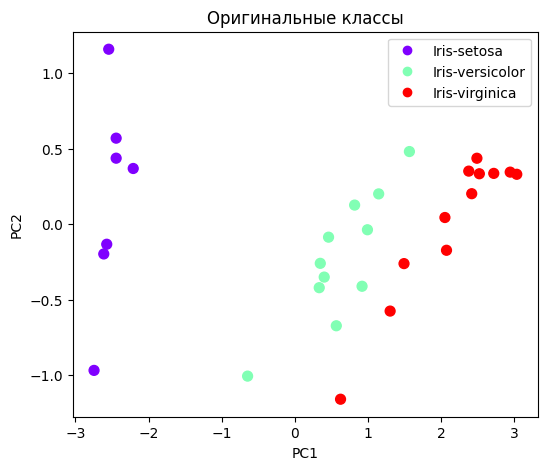

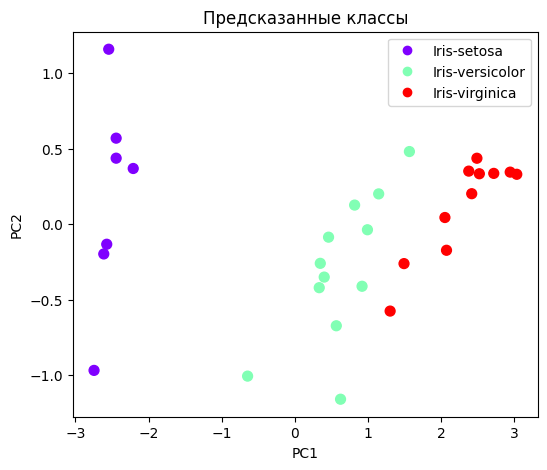

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 5))
scatter = plt.scatter(X_test_pca[:, 0], X_test_pca[:, 1], c=y_test, cmap='rainbow', s=50)
plt.title('Оригинальные классы')
plt.legend(handles=scatter.legend_elements()[0], labels = unique_classes.tolist())
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

plt.figure(figsize=(6, 5))
scatter = plt.scatter(X_test_pca[:, 0], X_test_pca[:, 1], c=y_pred_basic, cmap='rainbow', s=50)
plt.title('Предсказанные классы')
plt.legend(handles=scatter.legend_elements()[0], labels = unique_classes.tolist())
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()